In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# read in csv file
shipping = pd.read_csv('../raw_data/Train.csv')
shipping.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [3]:
# check data types
shipping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


Most of the data looks good. We can remove the ID column because it doesn't give us any useful information. We can also strip any leading or trailing spaces in the string columns.

In [4]:
# drop ID column
shipping = shipping.drop(columns=['ID'])
shipping.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,D,Flight,4,2,177,3,low,F,44,1233,1
1,F,Flight,4,5,216,2,low,M,59,3088,1
2,A,Flight,2,2,183,4,low,M,48,3374,1
3,B,Flight,3,3,176,4,medium,M,10,1177,1
4,C,Flight,2,2,184,3,medium,F,46,2484,1


In [5]:
# strip leading and trailing spaces in string columns
shipping['Warehouse_block'] = shipping['Warehouse_block'].str.strip()
shipping['Mode_of_Shipment'] = shipping['Mode_of_Shipment'].str.strip()
shipping['Product_importance'] = shipping['Product_importance'].str.strip()
shipping['Gender'] = shipping['Gender'].str.strip()

In [6]:
# check ranges and potential outliers
shipping.describe()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [7]:
# check string columns to make sure there's no typos or misspellings
shipping['Warehouse_block'].unique()

array(['D', 'F', 'A', 'B', 'C'], dtype=object)

In [8]:
shipping['Mode_of_Shipment'].unique()

array(['Flight', 'Ship', 'Road'], dtype=object)

In [9]:
shipping['Product_importance'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [10]:
shipping['Gender'].unique()

array(['F', 'M'], dtype=object)

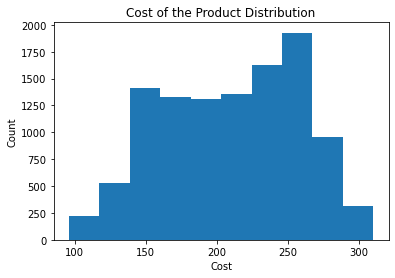

In [11]:
# plot distribution of cost
plt.hist(shipping['Cost_of_the_Product'])
plt.title('Cost of the Product Distribution')
plt.xlabel('Cost')
plt.ylabel('Count')
plt.show()

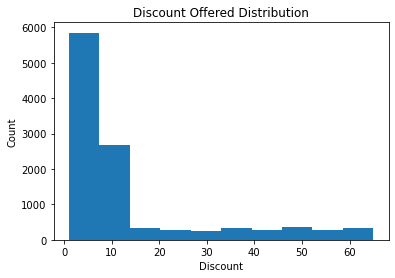

In [12]:
# distribution of discounts
plt.hist(shipping['Discount_offered'])
plt.title('Discount Offered Distribution')
plt.xlabel('Discount')
plt.ylabel('Count')
plt.show()

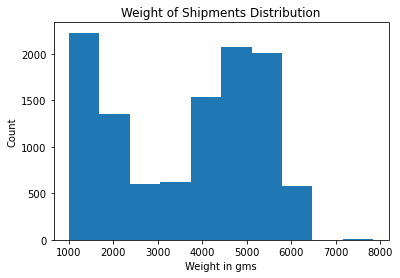

In [13]:
# distribution of weight
plt.hist(shipping['Weight_in_gms'])
plt.title('Weight of Shipments Distribution')
plt.xlabel('Weight in gms')
plt.ylabel('Count')
plt.show()

In [14]:
# check how many entries are greater than 7000 grams in weight
shipping.loc[shipping['Weight_in_gms'] > 7000]

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
198,D,Ship,2,3,142,3,medium,F,38,7640,1
199,F,Ship,2,2,154,3,medium,M,38,7846,1
205,F,Ship,2,3,145,3,medium,F,24,7588,1
213,B,Ship,2,5,160,3,medium,F,31,7401,1
245,F,Ship,2,4,154,3,medium,F,48,7684,1


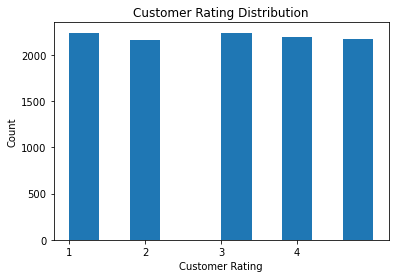

In [15]:
# customer rating distribution
plt.hist(shipping['Customer_rating'])
plt.title('Customer Rating Distribution')
plt.xlabel('Customer Rating')
plt.ylabel('Count')
plt.xticks(np.arange(1, 5, step=1))
plt.show()

Data looks very clean, not many changes were needed. We will now save this data set to be used for our next step.

In [16]:
# save dataframes
shipping.to_csv('shipping.csv')